## Credit Card Fraud Detection



### Dataset

The dataset used for this research is collected from Kaggle at [Link](https://www.kaggle.com/mlg-ulb/creditcardfraud). It consists of 284,807 transactions that occurred in 2 days, of which 492 are labelled as Fraud. This means that the dataset is highly unbalanced with only 0.172% accounting for the Fraud transactions. It consists of 31 features of which 28 (V1-V28) are the result of PCA transformation, due to confidentiality issues. The remaining features that are not transformed are ‘Time’ and ‘Amount’, which represent the seconds elapsed between each transaction and the first transaction in the dataset and, the transaction amount respectively. The ‘Class’ feature represents the label of the transaction with ‘1’ for a Fraud transaction and ‘0’ for a ‘Valid’ transaction.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [28]:
# Load the dataset (ensure you have the correct path to the file)
df = pd.read_csv("dataset/creditcard.csv")

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Understanding

The Dataset we use is the Kaggle Credit Card Fraud Detection Dataset enlisted in the following link: Link

- The Data has 32 features from V1-V28 which are unknown for confidentiality, Time, Amount and Class
- The input features are V1-V28, Time and Amount
- The target variable is Class
- The Data does not have any missing values as evident from the below mentioned code, thus need not be handled
- The Data consists of all numerical features, and only the Target Variable Class is a categorical feature.

      1. Class 0: Legitimate Transaction
      2. Class 1: Fraud Transaction

In [30]:
df.shape

(284807, 31)

In [31]:
# Check for missing values in each column
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [32]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class
0    284315
1       492
Name: count, dtype: int64


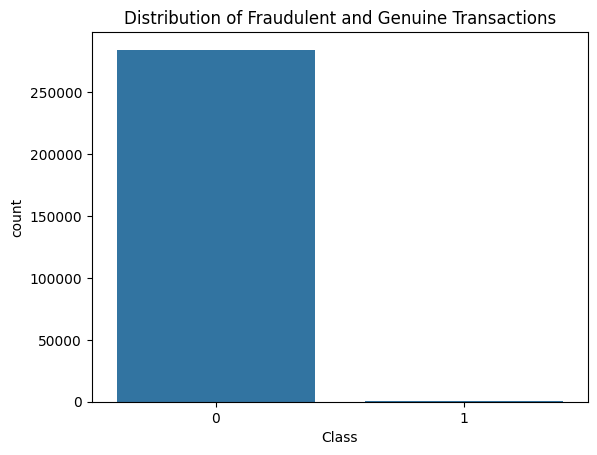

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of fraud and no fraud cases
print(df['Class'].value_counts())

# Plot the distribution of fraud vs. non-fraud transactions
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Genuine Transactions')
plt.show()

### Relationship of Fraud Transactions with Amount

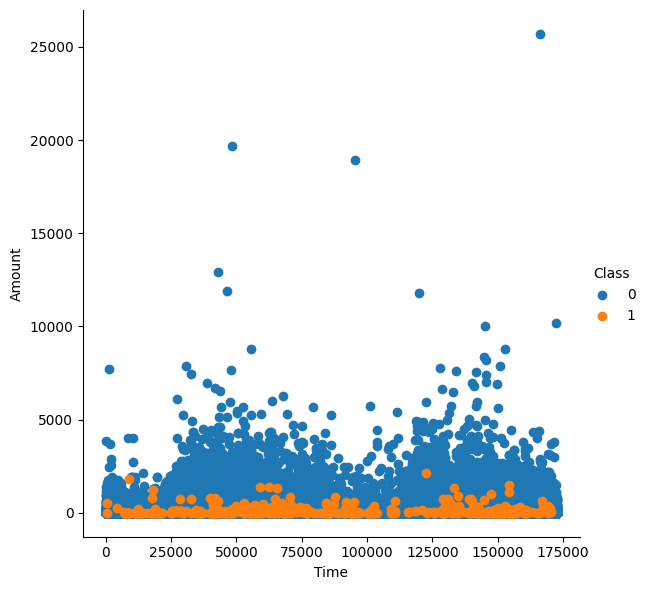

In [34]:
sns.FacetGrid(df, hue='Class', height=6).map(plt.scatter, 'Time', 'Amount').add_legend()

From the plot we can observe that the fraud transactions are generally not above an amount of 2500 and also observed that the fraud transactions are evenly distributed about time.

Create a scatter plot to observe the distribution of classes with time seconds in a day = 60 x 60 x 24 = 86400 i.e in 2 days = 172800
highest value in the time column = 172792
since the data is from just 2 days, we can conclude that the data is from 00:00:00 on day 1 to 11:59:59 on day 2
so doing a modulo of the time value by 86400 gives us the seconds elapsed from 00:00 in each day using which we can create bins

In [35]:
df2 = pd.DataFrame(df)

# Add new columns to df2
df2['seconds_from_12_am'] = df2['Time'] % 86400
bins = [-1, 14400, 28800, 43200, 57600, 72000, 86401]
labels = ['midnight to 4am', '4am to 8am', '8am to noon', 'noon to 4pm', '4pm to 8pm', '8pm to midnight']
df2['Time_Slot'] = pd.cut(df2['seconds_from_12_am'], bins, labels=labels)

# Display df2
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,seconds_from_12_am,Time_Slot
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,midnight to 4am
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,midnight to 4am
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,midnight to 4am
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,midnight to 4am
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2.0,midnight to 4am


In [36]:
series_counts = df2.groupby('Class')['Time_Slot'].value_counts().rename('count')
df2_counts = pd.DataFrame(series_counts)
df2_counts = df2_counts.reset_index()
df2_counts

,Class,Time_Slot,count
0,0,4pm to 8pm,65205
1,0,noon to 4pm,63729
2,0,8pm to midnight,60771
3,0,8am to noon,59487
4,0,midnight to 4am,18647
5,0,4am to 8am,16476
6,1,4pm to 8pm,103
7,1,midnight to 4am,90
8,1,8am to noon,86
9,1,noon to 4pm,83


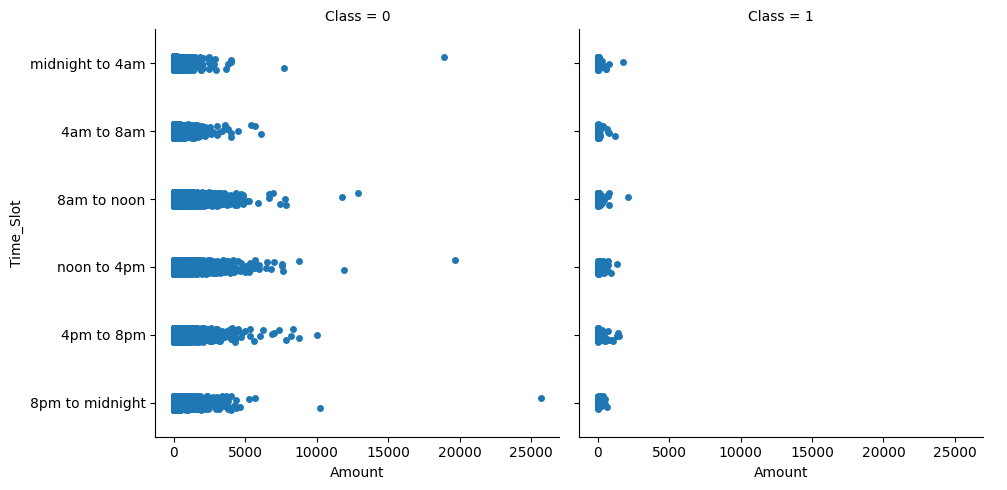

<Figure size 800x1600 with 0 Axes>

In [37]:
sns.catplot(x='Amount', y='Time_Slot', data=df2, col='Class')
plt.figure(figsize = (8,16))
plt.show()

## Data Preparation

In [38]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (284315, 31)
Shape of fraud :  (492, 31)


In [39]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))
     

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [40]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
# Separate the dataset into fraud and non-fraud datasets
df_fraud = df[df["Class"] == 1]
df_non_fraud = df[df["Class"] == 0]

# Under-sample the non-fraud transactions to match the number of fraud transactions
df_non_fraud_under = df_non_fraud.sample(len(df_fraud), random_state=42)

# Combine the under-sampled non-fraud transactions with the fraud transactions
df_balanced = pd.concat([df_fraud, df_non_fraud_under])

# Shuffle the combined dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Proceed with preprocessing on the balanced dataset
X = df_balanced.drop("Class", axis=1).values
y = df_balanced["Class"].values

In [42]:
def split(X, y, test_size=1 / 3):
    np.random.seed(42)  # For reproducibility
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [43]:
def manual_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [44]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [45]:
def precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [46]:
X_scaled = manual_scale(X)
X_train, X_test, y_train, y_test = split(X_scaled, y)

In [47]:
# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.theta))
        epsilon = 1e-5
        regularization = (self.lambda_ / (2 * m)) * np.sum(np.square(self.theta[1:]))
        cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)) + regularization
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.iterations):
            h = self.sigmoid(X.dot(self.theta))
            gradient = np.dot(X.T, (h - y)) / m
            gradient[1:] += (self.lambda_ / m) * self.theta[1:]
            self.theta -= self.learning_rate * gradient

    def predict_prob(self, X):
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X, threshold=0.5):
        return (self.predict_prob(X) >= threshold).astype(int)

In [48]:
# SVM Implementation
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

In [49]:
class SimpleDecisionTree:
    def __init__(self, depth=1, max_depth=None):
        self.depth = depth
        self.max_depth = max_depth
        self.left = None
        self.right = None
        self.threshold = None
        self.index = None
        self.value = None

    def _find_splits(self, X):
        split_values = []
        for i in range(X.shape[1]):
            unique_values = np.unique(X[:, i])
            for j in range(len(unique_values) - 1):
                split_values.append(((unique_values[j] + unique_values[j + 1]) / 2, i))
        return split_values

    def _split(self, X, threshold, index):
        left_idx = np.where(X[:, index] <= threshold)
        right_idx = np.where(X[:, index] > threshold)
        return left_idx, right_idx

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        p = counts / counts.sum()
        gini = 1 - np.sum(p ** 2)
        return gini

    def _gain(self, left_y, right_y, current_uncertainty):
        p = float(len(left_y)) / (len(left_y) + len(right_y))
        return current_uncertainty - p * self._gini(left_y) - (1 - p) * self._gini(right_y)

    def fit(self, X, y):
        if self.depth is None or self.depth < self.max_depth:
            best_gain = 0
            best_split = None
            current_uncertainty = self._gini(y)
            splits = self._find_splits(X)

            for split in splits:
                left_idx, right_idx = self._split(X, *split)
                if len(left_idx[0]) == 0 or len(right_idx[0]) == 0:
                    continue

                gain = self._gain(y[left_idx], y[right_idx], current_uncertainty)

                if gain > best_gain:
                    best_gain = gain
                    best_split = split

            if best_split is not None:
                self.threshold, self.index = best_split
                left_idx, right_idx = self._split(X, *best_split)
                self.left = SimpleDecisionTree(self.depth + 1, self.max_depth)
                self.left.fit(X[left_idx], y[left_idx])
                self.right = SimpleDecisionTree(self.depth + 1, self.max_depth)
                self.right.fit(X[right_idx], y[right_idx])
                return

        self.value = np.round(np.mean(y)).astype(int)

    def predict(self, X):
        if self.value is not None:
            return np.array([self.value] * len(X))

        else:
            left_idx, right_idx = self._split(X, self.threshold, self.index)
            left_preds = self.left.predict(X[left_idx])
            right_preds = self.right.predict(X[right_idx])
            predictions = np.zeros(X.shape[0])
            predictions[left_idx] = left_preds
            predictions[right_idx] = right_preds
            return predictions

class RandomForest:
    def __init__(self, n_trees=10, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = [SimpleDecisionTree(max_depth=self.max_depth) for _ in range(self.n_trees)]
        for tree in self.trees:
            tree.fit(X, y)

    def predict(self, X):
        # Ensuring predictions are cast to integers
        tree_preds = np.array([tree.predict(X).astype(int) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        # Using mode to aggregate predictions
        mode_preds = [np.bincount(tree_pred).argmax() for tree_pred in tree_preds]
        return np.array(mode_preds)

In [50]:
# Logistic Regression Model Training and Evaluation
model_lr = LogisticRegression(learning_rate=0.1, iterations=3000, lambda_=0.1)
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
accuracy_lr = np.mean(predictions_lr == y_test)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

Logistic Regression Accuracy: 90.55%


In [51]:
# SVM Model Training and Evaluation
svm = LinearSVM()
svm.fit(X_train, y_train)
predictions_svm = svm.predict(X_test)
predictions_svm = np.where(predictions_svm < 0, 0, 1)
print(f"SVM Accuracy: {accuracy(y_test, predictions_svm) * 100:.2f}%")
precision, recall, f1 = precision_recall_f1(y_test, predictions_svm)
print(f"SVM Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

SVM Accuracy: 92.68%
SVM Precision: 0.9813664596273292, Recall: 0.88268156424581, F1-Score: 0.9294117647058824


In [52]:
model_rf = RandomForest(n_trees=10, max_depth=10)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

accuracy_rf = accuracy(y_test, predictions_rf)
precision_rf, recall_rf, f1_rf = precision_recall_f1(y_test, predictions_rf)
accuracy_rf, precision_rf, recall_rf, f1_rf

(0.9115853658536586,
 0.9310344827586207,
 0.9050279329608939,
 0.9178470254957508)